In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii, fits
from astroquery.vizier import Vizier
from astropy.table import Table
import splat
import matplotlib as mpl
#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.bottom']=True
mpl.rcParams['xtick.top']=True
mpl.rcParams['xtick.major.width']=0.9
mpl.rcParams['xtick.minor.width']=0.9
mpl.rcParams['ytick.major.width']=0.9
mpl.rcParams['ytick.minor.width']=0.9
mpl.rcParams['ytick.right']=True
mpl.rcParams['ytick.left']=True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

mpl.rcParams['font.serif'] = 'Ubuntu'
#mpl.rcParams['font.monospace'] = 'Ubuntu Mono'
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.titlesize'] = 18

%matplotlib inline


Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [2]:
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [3]:
#kiman catalog
dt=pd.read_hdf(DATA_FOLDER+'/merged_Mdwarfs.h5', key='merged')

In [4]:
df_panstarrs=pd.read_csv(DATA_FOLDER+'/GaiaSDSSPanstarrsWith.csv', 
                          comment='#')

In [5]:
df_panstarrs.columns


Index(['angDist', 'col1', 'RA_x', 'DEC_x', 'OBJID', 'objID', 'RAJ2000',
       'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'f_objID', 'Qual',
       'Epoch', 'Ns', 'Nd', 'gmag', 'e_gmag', 'gKmag', 'e_gKmag', 'gFlags',
       'rmag', 'e_rmag', 'rKmag', 'e_rKmag', 'rFlags', 'imag', 'e_imag',
       'iKmag', 'e_iKmag', 'iFlags', 'zmag', 'e_zmag', 'zKmag', 'e_zKmag',
       'zFlags', 'ymag', 'e_ymag', 'yKmag', 'e_yKmag', 'yFlags'],
      dtype='object')

(array([53417., 12094.,  4949.,  3056.,  2060.,  1527.,  1298.,  1159.,
         1248.,  1277.]),
 array([1.1300000e-03, 5.0099840e-01, 1.0008668e+00, 1.5007352e+00,
        2.0006036e+00, 2.5004720e+00, 3.0003404e+00, 3.5002088e+00,
        4.0000772e+00, 4.4999456e+00, 4.9998140e+00]),
 <BarContainer object of 10 artists>)

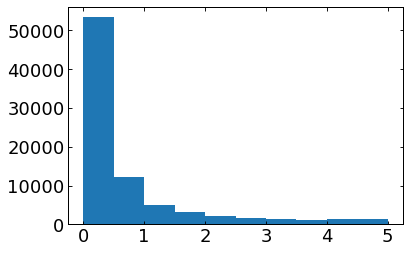

In [6]:
plt.hist(df_panstarrs['angDist'])

In [7]:
df=(pd.DataFrame(df_panstarrs))

In [8]:
df['OBJID']=df.OBJID.astype(int)
dt['OBJID']=dt.OBJID.astype(int)

In [9]:
merged=pd.merge(dt, df, on=['OBJID'], how='left')

In [10]:
#merged['angdist']

In [11]:
Distance= (16.9465, 0.0356)

In [12]:
def get_abs_mag(m, d, unc=False):
    if unc:
        mags=np.random.normal(m[0], m[1], 1000)
        ds= np.random.normal(d[0], d[1], 1000)
        res=mags-5*np.log10(ds/10.0)
        return np.nanmedian(res), np.nanstd(res)
    else:
        return m-5*np.log10(d/10.0)

In [13]:
mask=np.logical_and.reduce([merged.photometric_sample_subg !=0,
                            merged.photometric_sample_subred !=0,
                            merged.GOODPHOT_SDSS ==1, 
                            merged.GOODMATCH==1,
                            merged.astrometric_sample==1,
                            abs(merged.parallax_error/merged.parallax)<0.5,
                           merged.DIST < 100.0,
                           merged.angDist<1])

In [14]:
# get_abs_mag(G, 16.7)

Gaia BP (mag) 14.183 ±0.005  <br />
Gaia GP (mag) 12.991± 0.003  <br />
Gaia RP (mag) 11.010 ± 0.004  <br />
PanSTARRS (mag) 14.621 ± 0.001 <br />
MKO J (mag) 9.150 ± 0.026  <br />
MKO H (mag) 8.470 ± 0.029  <br />
MKO K (mag) 8.154 ± 0.023  <br />
WISE W1 (mag) 7.936 ± 0.026 <br />
WISE W2 (mag) 7.768 ± 0.020 <br />
WISE W3 (mag) 7.650 ± 0.018 <br />
WISE W4 (mag) 7.329 ± 0.154 <br />

In [15]:
B=15.44
V=13.74
G, BP, RP=(12.991280, 0.003), (14.183434, 0.005), (11.010448, 0.004)
K=(8.154, 0.023)
H=(8.470, 0.029)
J=(9.150, 0.026)
USNO_B1=15.33
USNO_B2=14.73
USNO_R1=12.80
USNO_R2=13.08
USNO_I=10.89
PS1_GK=(14.6242,  0.001)
#USNO_K=

In [16]:
get_abs_mag(G, Distance, unc=True)

(11.84566754190795, 0.005512783770601414)

In [52]:
cmap=plt.get_cmap('Accent')

In [59]:
2.5*np.log10(1+10**(-0.4*-0.1))

0.8037258750007202

In [62]:
from matplotlib.colors import Normalize

In [63]:
cnorm=Normalize(2, 9)
colors = cmap(np.arange(2, 10))

In [47]:
data=merged

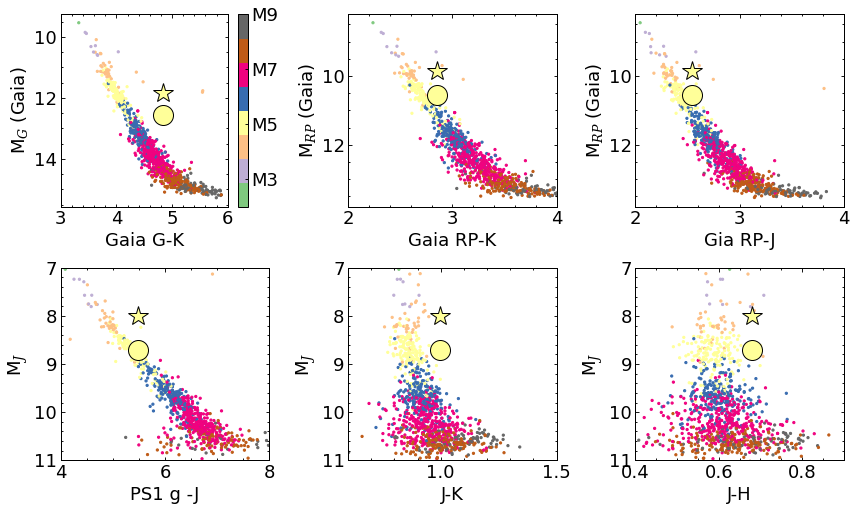

In [66]:
fig, ax0=plt.subplots(ncols=3, nrows=2, figsize=(20*0.6, 12*0.6))
ax=np.concatenate(ax0)

cx0=ax[0].scatter(data.phot_g_mean_mag[mask]-data.KMAG[mask], get_abs_mag(data.phot_g_mean_mag[mask],data.DIST[mask]),
              s=20, marker='.', c=data[mask].SPT_x, cmap=cmap, vmin=2, vmax=9)

cx=ax[1].scatter(data.phot_rp_mean_mag[mask]-data.KMAG[mask], get_abs_mag(data.phot_rp_mean_mag[mask],data.DIST[mask]),
              s=20, marker='.',  c=data[mask].SPT_x, cmap=cmap, vmin=2, vmax=9)

cx=ax[2].scatter(data.phot_rp_mean_mag[mask]-data.HMAG[mask], 
                 get_abs_mag(data.phot_rp_mean_mag[mask],data.DIST[mask]),
              s=20, marker='.',  c=data[mask].SPT_x, cmap=cmap,  vmin=2, vmax=9)

cx=ax[-1].scatter(data.JMAG[mask]-data.HMAG[mask], get_abs_mag(data.JMAG[mask],data.DIST[mask]),
              s=20, marker='.', c=data[mask].SPT_x, cmap=cmap,  vmin=2, vmax=9)

cx=ax[-2].scatter(data.JMAG[mask]-data.KMAG[mask], get_abs_mag(data.JMAG[mask],data.DIST[mask]),
              s=20, marker='.', c=data[mask].SPT_x, cmap=cmap,  vmin=2, vmax=9)
cx= ax[-3].scatter( data.gKmag[mask]-data.JMAG[mask],  get_abs_mag(data.JMAG[mask],data.DIST[mask]),
                   
                   s=20, marker='.', c=data[mask].SPT_x, cmap=cmap,  vmin=2, vmax=9)


ax[0].errorbar(G[0]-K[0], get_abs_mag(G, Distance, unc=True)[0],\
               xerr=G[1]-K[1], yerr=get_abs_mag(G, Distance, unc=True)[1], \
               fmt='*', ms=20, mec='k', mfc=cmap(cnorm(5)))
ax[1].errorbar(RP[0]-K[0], get_abs_mag(RP, Distance, unc=True)[0],\
               xerr=RP[1]-K[1],  yerr=get_abs_mag(RP, Distance, unc=True)[1],\
               fmt='*', ms=20,  mec='k', mfc=cmap(cnorm(5)))
ax[2].errorbar(RP[0]-H[0], get_abs_mag(RP, Distance, unc=True)[0],\
               xerr=RP[1]-H[1],yerr=get_abs_mag(RP, Distance, unc=True)[1],\
               fmt='*', ms=20,  mec='k', mfc=cmap(cnorm(5)))
ax[-1].errorbar(J[0]-H[0], get_abs_mag(J, Distance, unc=True)[0],\
                xerr=J[1]-H[1], yerr=get_abs_mag(J, Distance, unc=True)[1],
                fmt='*', ms=20, mec='k', mfc=cmap(cnorm(5)))
ax[-2].errorbar(J[0]-K[0], get_abs_mag(J, Distance, unc=True)[0],\
                xerr=J[1]-K[1], yerr=get_abs_mag(J, Distance, unc=True)[1],\
                fmt='*', ms=20,  mec='k', mfc=cmap(cnorm(5)))
ax[-3].errorbar(PS1_GK[0]-J[0], get_abs_mag(J,Distance, unc=True)[0],\
                xerr=PS1_GK[1]-J[1],  yerr=get_abs_mag(J,Distance, unc=True)[1],\
                fmt='*',ms=20,  mec='k', mfc=cmap(cnorm(5)))

ax[0].errorbar(G[0]-K[0], get_abs_mag(G, Distance, unc=True)[0]+0.7,\
               xerr=G[1]-K[1], yerr=get_abs_mag(G, Distance, unc=True)[1], \
               fmt='o', ms=20, mec='k', mfc=cmap(cnorm(5)))
ax[1].errorbar(RP[0]-K[0], get_abs_mag(RP, Distance, unc=True)[0]+0.7,\
               xerr=RP[1]-K[1],  yerr=get_abs_mag(RP, Distance, unc=True)[1],\
               fmt='o', ms=20,  mec='k', mfc=cmap(cnorm(5)))
ax[2].errorbar(RP[0]-H[0], get_abs_mag(RP, Distance, unc=True)[0]+0.7,\
               xerr=RP[1]-H[1],yerr=get_abs_mag(RP, Distance, unc=True)[1],\
               fmt='o', ms=20,  mec='k', mfc=cmap(cnorm(5)))
ax[-1].errorbar(J[0]-H[0], get_abs_mag(J, Distance, unc=True)[0]+0.7,\
                xerr=J[1]-H[1], yerr=get_abs_mag(J, Distance, unc=True)[1],
                fmt='o', ms=20, mec='k', mfc=cmap(cnorm(5)))
ax[-2].errorbar(J[0]-K[0], get_abs_mag(J, Distance, unc=True)[0]+0.7,\
                xerr=J[1]-K[1], yerr=get_abs_mag(J, Distance, unc=True)[1],\
                fmt='o', ms=20,   mec='k', mfc=cmap(cnorm(5)))
ax[-3].errorbar(PS1_GK[0]-J[0], get_abs_mag(J,Distance, unc=True)[0]+0.7,\
                xerr=PS1_GK[1]-J[1],  yerr=get_abs_mag(J,Distance, unc=True)[1],\
                fmt='o',ms=20, mec='k', mfc=cmap(cnorm(5)))

#cx=ax1.scatter(data.phot_bp_mean_mag[mask]-data.phot_g_mean_mag[mask], get_abs_mag(data.phot_g_mean_mag[mask],data.DIST[mask]),
#           c= data['HALPHA'][mask],s=1. , alpha=0.3, vmin=-1, vmax=0.7)
#ax.errorbar
#cx=ax2.scatter(data.JMAG[mask]-data.KMAG[mask], get_abs_mag(data.JMAG[mask],data.DIST[mask]),
#           c= data['HALPHA'][mask],s=1. , alpha=0.3, vmin=-1, vmax=0.7)

tick_list = [3, 5, 7, 9]
cbar=plt.colorbar(cx0, ax=ax[0], ticks=tick_list )

#cbar.ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8], which='major')
cbar.ax.set_yticklabels(['M3', 'M5', 'M7', 'M9'])

ax[0].set_xlim([3, 6.])
ax[1].set_xlim([2, 4.])
ax[2].set_xlim([2., 4])
ax[-1].set_xlim([0.4, .9])
ax[-1].set_ylim([7, 11.0])

ax[-2].set_xlim([0.6, 1.5])
ax[-2].set_ylim([7, 11.0])

ax[-3].set_ylim([7, 11.0])
ax[-3].set_xlim([4, 8.])
for a in ax:
    a.invert_yaxis()
    a.minorticks_on()
ax[0].set_xlabel('Gaia G-K', fontsize=18)
ax[0].set_ylabel(r'M$_G$ (Gaia)', fontsize=18)

ax[1].set_xlabel('Gaia RP-K', fontsize=18)
ax[1].set_ylabel(r'M$_{RP}$ (Gaia)', fontsize=18)

ax[2].set_xlabel('Gia RP-J', fontsize=18)
ax[2].set_ylabel(r'M$_{RP}$ (Gaia)', fontsize=18)


ax[-1].set_xlabel('J-H', fontsize=18)
ax[-1].set_ylabel(r'M$_J$', fontsize=18)

ax[-2].set_xlabel('J-K', fontsize=18)
ax[-2].set_ylabel(r'M$_J$', fontsize=18)

ax[-3].set_xlabel('PS1 g -J', fontsize=18)
ax[-3].set_ylabel(r'M$_J$', fontsize=18)
plt.tight_layout()

plt.savefig(FIG_FOLDER+'/all_cmds.pdf',  bbox_inches='tight',  \
            facecolor='white', transparent=False, rasterized=True)

In [ ]:
#color-spectral type relations
